In [69]:
#import libraries
import pandas as pd
import sys
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [76]:
#import data
from data_load import get_clean_data

data = get_clean_data('data.csv')

col_list = list(data.columns)
#for col in col_list:
data = data[data.current_average!='NaN']
data = data[data.class_attendance!='NaN']
data = data[data.academic_priority!='NaN']

#label encode data points
data['current_average'] = np.where(data.current_average == 'Prefer not to say', 0, data.current_average)
data['current_average'] = np.where(data.current_average == '60-64%', 1, data.current_average)
data['current_average'] = np.where(data.current_average == '65-69%', 2, data.current_average)
data['current_average'] = np.where(data.current_average == '70-74%', 3, data.current_average)
data['current_average'] = np.where(data.current_average == '75-79%', 4, data.current_average)
data['current_average'] = np.where(data.current_average == '75-79%', 5, data.current_average)
data['current_average'] = np.where(data.current_average == '80-84%', 6, data.current_average)
data['current_average'] = np.where(data.current_average == '85-89%', 7, data.current_average)
data['current_average'] = np.where(data.current_average == '90-94%', 8, data.current_average)
data['current_average'] = np.where(data.current_average == '95-100%', 9, data.current_average)



data['class_attendance'] = np.where(data.class_attendance == 'Almost none', 0, data.class_attendance)
data['class_attendance'] = np.where(data.class_attendance == 'Around half', 1, data.class_attendance)
data['class_attendance'] = np.where(data.class_attendance == 'Almost all', 2, data.class_attendance)

data['academic_priority'] = np.where(data.academic_priority == 'Yes', 0, data.academic_priority)
data['academic_priority'] = np.where(data.academic_priority == 'No', 1, data.academic_priority)

data['social_time'] = np.where(data.social_time == 'Rarely', 0, data.social_time)
data['social_time'] = np.where(data.social_time == 'Once/Twice Weekly', 1, data.social_time)
data['social_time'] = np.where(data.social_time == 'Multiple Weekly', 2, data.social_time)


data.to_csv('jonTest.csv')

data.columns



Index(['Timestamp', 'current_year', 'faculty', 'hs_average',
       'nationality_status', 'parent1_education', 'parent2_education',
       'social_time', 'class_attendance', 'screen_time', 'sleep_time',
       'excercise_time', 'school_work_time', 'coop_time', 'academic_priority',
       'current_average'],
      dtype='object')

In [71]:
#kMeans clustering for class attendance, academic priority, and current average
dataset = data[['class_attendance','academic_priority','current_average']]

#kMeans clustering for class attendance, acedmic priority, and social time
dataset2 = data[['class_attendance','academic_priority','social_time']] 
    
dataset.to_csv('jonTest.csv')

In [73]:
# create kmeans object and call fit
KM = KMeans(n_clusters=3, init='k-means++', random_state=170)
KM = KM.fit(dataset)
print("The cluster centroids are: \n", KM.cluster_centers_)
print("Cluster_label:\n", KM.labels_)
print("Sum of distances of samples to their closest cluster center: \n", KM.inertia_)

# create kmeans object and call fit
KM2 = KMeans(n_clusters=3, init='k-means++', random_state=170)
KM2 = KM2.fit(dataset2)
print("The cluster centroids are: \n", KM2.cluster_centers_)
print("Cluster_label:\n", KM2.labels_)
print("Sum of distances of samples to their closest cluster center: \n", KM2.inertia_)

The cluster centroids are: 
 [[1.76923077 0.27350427 6.55555556]
 [1.67901235 0.66666667 3.62962963]
 [1.66666667 0.79487179 1.25641026]]
Cluster_label:
 [0 1 0 1 1 1 1 1 1 0 1 1 0 2 0 2 1 2 2 2 0 2 1 1 1 1 1 0 0 1 1 0 1 2 1 0 2
 2 0 0 0 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 2 2 1
 1 0 2 0 2 1 0 1 0 0 2 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 2 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 2 2 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0
 2 2 1 0 0 0 0 1 0 1 2 0 0 1 0 1 0 0 0 2 1 1 1 0 2 2 0 2 1 2 0 1 0 1 0 0 0
 1 1 2 0 2 0 0 1 0 1 1 2 1 1 2 2 1 1 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 2 1 1 0
 2 1 0 1 0 0 2 1 1 0 2 0 1 2 1]
Sum of distances of samples to their closest cluster center: 
 227.91073124406455
The cluster centroids are: 
 [[1.9453125  0.4375     0.71875   ]
 [0.77083333 0.5625     1.58333333]
 [2.         0.55737705 2.        ]]
Cluster_label:
 [2 0 0 1 1 2 0 2 0 0 0 2 2 0 1 2 1 2 1 1 1 1 2 2 2 2 0 2 0 0 0 2 2 2 2 0 0
 0 0 2 0 0 2 0 2 0 0 2 0 2 0 0 2 0 1 0 2 1 0 1 1 0 1 

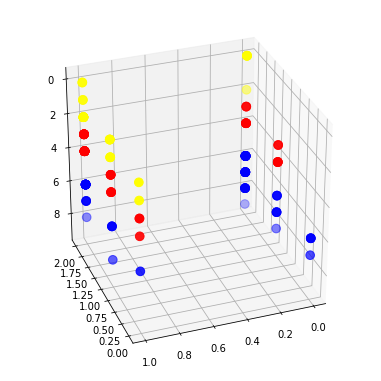

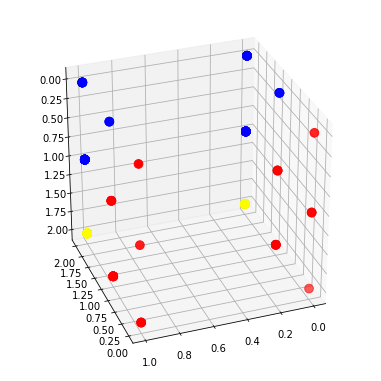

In [75]:
colors_3 = ['blue','red','yellow']
fig = plt.figure(1, figsize=(5, 5))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(dataset.academic_priority, 
           dataset.class_attendance, 
           dataset.current_average, 
           c=KM.labels_, 
           cmap=matplotlib.colors.ListedColormap(colors_3),
           s=75)
plt.show()

colors_3 = ['blue','red','yellow']
fig = plt.figure(1, figsize=(5, 5))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(dataset2.academic_priority, 
           dataset2.class_attendance, 
           dataset2.social_time, 
           c=KM2.labels_, 
           cmap=matplotlib.colors.ListedColormap(colors_3),
           s=75)
plt.show()